<a href="https://colab.research.google.com/github/sophiezydfifi/207fall-project-ding-peteh-valadez-zhang/blob/main/207_Milestone_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Challenges and Pre-processing**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
# upload the file and please replace the file link
df = pd.read_csv("/content/NBA Player Stats and Salaries_2010-2025.csv")
print(df.shape)
df.head()

(7298, 31)


Player    Salary  Year Pos  Age Team   G  GS    MP   FG  ...  \
0       Kobe Bryant  23034375  2010  SG   31  LAL  73  73  38.8  9.8  ...   
1   Jermaine O'Neal  23016000  2010   C   31  MIA  70  70  28.4  5.6  ...   
2     Tracy McGrady  22843124  2010  SG   30  NYK  30  24  22.4  3.0  ...   
3        Tim Duncan  22183220  2010   C   33  SAS  78  77  31.3  7.2  ...   
4  Shaquille O'Neal  21000000  2010   C   37  CLE  53  53  23.4  4.9  ...   

     FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.811  1.1  4.3   5.4  5.0  1.5  0.3  3.2  2.6  27.0  
1  0.720  1.8  5.2   6.9  1.3  0.4  1.4  1.8  3.0  13.6  
2  0.746  0.7  2.4   3.1  3.3  0.5  0.5  1.5  1.3   8.2  
3  0.725  2.8  7.3  10.1  3.2  0.6  1.5  1.8  1.9  17.9  
4  0.496  1.8  4.9   6.7  1.5  0.3  1.2  2.0  3.2  12.0  

[5 rows x 31 columns]

In [ ]:
# Quick structure overview
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7298 entries, 0 to 7297
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  7298 non-null   object 
 1   Salary  7298 non-null   int64  
 2   Year    7298 non-null   int64  
 3   Pos     7298 non-null   object 
 4   Age     7298 non-null   int64  
 5   Team    7298 non-null   object 
 6   G       7298 non-null   int64  
 7   GS      7298 non-null   int64  
 8   MP      7298 non-null   float64
 9   FG      7298 non-null   float64
 10  FGA     7298 non-null   float64
 11  FG%     7278 non-null   float64
 12  3P      7298 non-null   float64
 13  3PA     7298 non-null   float64
 14  3P%     6713 non-null   float64
 15  2P      7298 non-null   float64
 16  2PA     7298 non-null   float64
 17  2P%     7253 non-null   float64
 18  eFG%    7278 non-null   float64
 19  FT      7298 non-null   float64
 20  FTA     7298 non-null   float64
 21  FT%     7096 non-null   float64
 22  

3P%       585
FT%       202
2P%        45
FG%        20
eFG%       20
Pos         0
Player      0
G           0
Team        0
GS          0
MP          0
FGA         0
Age         0
Salary      0
Year        0
3PA         0
3P          0
FG          0
2PA         0
2P          0
dtype: int64

In [ ]:
# For the missing values. They are all data derived from other non-missing columns. Hence I can fill percentage columns with 0
perc_cols = ["3P%", "FT%", "2P%", "FG%", "eFG%"]
df[perc_cols] = df[perc_cols].fillna(0)

# Double check
df[perc_cols].isnull().sum()

3P%     0
FT%     0
2P%     0
FG%     0
eFG%    0
dtype: int64

In [ ]:
# I want to adjust all the salary from different years to the level of 2025 based on the NBA cap. (https://www.spotrac.com/nba/cba/)
#Salary Cap Maximum values (from  the NBA salary Cap table, 2010–2025)
cap_data = {
    "Year": [
        2010, 2011, 2012, 2013, 2014, 2015,
        2016, 2017, 2018, 2019, 2020, 2021,
        2022, 2023, 2024, 2025
    ],
    "Cap": [
        58040000, 58044000, 58044000, 58679000,
        63065000, 70000000, 94143000, 99093000,
        101869000, 109140000, 109140000, 112414000,
        123655000, 136021000, 140588000, 154647000
    ]
}

cap_df = pd.DataFrame(cap_data)
cap_df

Year        Cap
0   2010   58040000
1   2011   58044000
2   2012   58044000
3   2013   58679000
4   2014   63065000
5   2015   70000000
6   2016   94143000
7   2017   99093000
8   2018  101869000
9   2019  109140000
10  2020  109140000
11  2021  112414000
12  2022  123655000
13  2023  136021000
14  2024  140588000
15  2025  154647000

In [ ]:
# Merge salary cap info into NBA dataset
df_adj = df.merge(cap_df, on="Year", how="left")
# Define 2025 cap
cap_2025 = 154647000

# Adjust all salaries to 2025 cap level
df_adj["Salary_2025_Adjusted"] = df_adj["Salary"] * (cap_2025 / df_adj["Cap"])

In [ ]:
# encode categorical values like position and team
df_working = pd.get_dummies(df_adj, columns=["Pos", "Team"], drop_first=True)

In [ ]:
#Classify the salary into low, mid and high categories
# Define quantile cutoffs (33rd and 66th percentiles)
q33 = df_working["Salary_2025_Adjusted"].quantile(0.33)
q66 = df_working["Salary_2025_Adjusted"].quantile(0.66)

# Create a categorical variable for salary tiers
def categorize_salary(salary):
    if salary <= q33:
        return "Low"
    elif salary <= q66:
        return "Medium"
    else:
        return "High"

class_order = ["Low", "Medium", "High"]

df_working["Salary_Tier"] = df_working["Salary_2025_Adjusted"].apply(categorize_salary)

# Quick check of class balance
print(df_working["Salary_Tier"].value_counts())



Salary_Tier
High      2481
Low       2409
Medium    2408
Name: count, dtype: int64


In [ ]:
# check shape to head into splitting
print('Shape of data', df_working.shape)
df_working.head(800)

Shape of data (7298, 78)


Player    Salary  Year  Age   G  GS    MP   FG   FGA    FG%  \
0         Kobe Bryant  23034375  2010   31  73  73  38.8  9.8  21.5  0.456   
1     Jermaine O'Neal  23016000  2010   31  70  70  28.4  5.6  10.6  0.529   
2       Tracy McGrady  22843124  2010   30  30  24  22.4  3.0   7.8  0.387   
3          Tim Duncan  22183220  2010   33  78  77  31.3  7.2  13.9  0.518   
4    Shaquille O'Neal  21000000  2010   37  53  53  23.4  4.9   8.7  0.566   
..                ...       ...   ...  ...  ..  ..   ...  ...   ...    ...   
795  Dante Cunningham    762195  2011   23  78  18  21.0  2.8   6.1  0.462   
796     Derrick Brown    762195  2011   23  49   1  11.8  1.5   2.7  0.565   
797        A.J. Price    762195  2011   24  50   0  15.9  2.3   6.4  0.356   
798    DaJuan Summers    762195  2011   23  22   1   9.0  1.3   3.1  0.406   
799   Marcus Thornton    762195  2011   23  73  23  24.3  4.8  11.1  0.434   

     ...  Team_ORL  Team_PHI  Team_PHO  Team_POR  Team_SAC  Team_SAS  \
0    ...     False     False     False     False     False     False   
1    ...     False     False     False     False     False     False   
2    ...     False     False     False     False     False     False   
3    ...     False     False     False     False     False      True   
4    ...     False     False     False     False     False     False   
..   ...       ...       ...       ...       ...       ...       ...   
795  ...     False     False     False     False     False     False   
796  ...     False     False     False     False     False     False   
797  ...     False     False     False     False     False     False   
798  ...     False     False     False     False     False     False   
799  ...     False     False     False     False      True     False   

     Team_TOR  Team_UTA  Team_WAS  Salary_Tier  
0       False     False     False         High  
1       False     False     False         High  
2       False     False     False         High  
3       False     False     False         High  
4       False     False     False         High  
..        ...       ...       ...          ...  
795     False     False     False          Low  
796     False     False     False          Low  
797     False     False     False          Low  
798     False     False     False          Low  
799     False     False     False          Low  

[800 rows x 78 columns]

In [ ]:
# permutation for shuffling
np.random.seed(0)
n   = len(df_working)
idx = np.random.permutation(n)

# reset and clean up the index from gaps in preprocessing
df_working = df_working.reset_index(drop = True).iloc[idx].reset_index(drop = True)

In [ ]:
# features of interest
num_features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
cat_features = ['Pos_C-PF', 'Pos_PF', 'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-C', 'Pos_SF-PF', 'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PF', 'Pos_SG-PG', 'Pos_SG-SF',
                'Team_BOS', 'Team_BRK', 'Team_CHA', 'Team_CHI', 'Team_CHO', 'Team_CLE', 'Team_DAL', 'Team_DEN', 'Team_DET', 'Team_GSW', 'Team_HOU', 'Team_IND', 'Team_LAC', 'Team_LAL', 'Team_MEM', 'Team_MIA',
                'Team_MIL', 'Team_MIN', 'Team_NJN', 'Team_NOH', 'Team_NOP', 'Team_NYK', 'Team_OKC', 'Team_ORL', 'Team_PHI', 'Team_PHO', 'Team_POR', 'Team_SAC', 'Team_SAS', 'Team_TOR', 'Team_UTA', 'Team_WAS']

# define features for the training
X = df_working[num_features + cat_features]  # drop columns I don't want to use

y = df_working["Salary_2025_Adjusted"]

In [ ]:
# split data 60 train 20 val 20 test
x_train, x_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.40, random_state = 1234)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size = 0.50, random_state = 1234)

In [ ]:
#Many ML models (regression, KNN, neural nets) need features on similar scales.
#Tree models (Random Forest, Gradient Boosting) don’t need scaling, but it’s fine to keep a standardized version for consistency.
from sklearn.preprocessing import StandardScaler

#numeric standardization
scaler = StandardScaler()

# fits standardization on x_train keeps column names and preserve row shuffle
x_train_num = pd.DataFrame(
    scaler.fit_transform(x_train[num_features]),
    columns = num_features,
    index = x_train.index
)

# fits same scaler on x_val keeps column names and preserve row shuffle
x_val_num = pd.DataFrame(
    scaler.transform(x_val[num_features]),
    columns = num_features,
    index = x_val.index
)

# fits same scaler on x_test keeps column names and preserve rows
x_test_num = pd.DataFrame(
    scaler.transform(x_test[num_features]),
    columns = num_features,
    index = x_test.index
)

In [ ]:
# put together standardized features
x_train_scaled = pd.concat([x_train_num, x_train[cat_features]], axis = 1)
x_val_scaled = pd.concat([x_val_num, x_val[cat_features]], axis = 1)
x_test_scaled = pd.concat([x_test_num, x_test[cat_features]], axis = 1)

print("x_train_scaled: ", x_train_scaled.shape, " y_train: ", y_train.shape)
print("x_val_scaled: ", x_val_scaled.shape,   " y_val: ", y_val.shape)
print("x_test_scaled: ", x_test_scaled.shape,  " y_test: ", y_test.shape)

x_train_scaled:  (4378, 72)  y_train:  (4378,)
x_val_scaled:  (1460, 72)  y_val:  (1460,)
x_test_scaled:  (1460, 72)  y_test:  (1460,)


# **EDA and visualizations**

In [ ]:
# plot the salary graph to show distribution
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

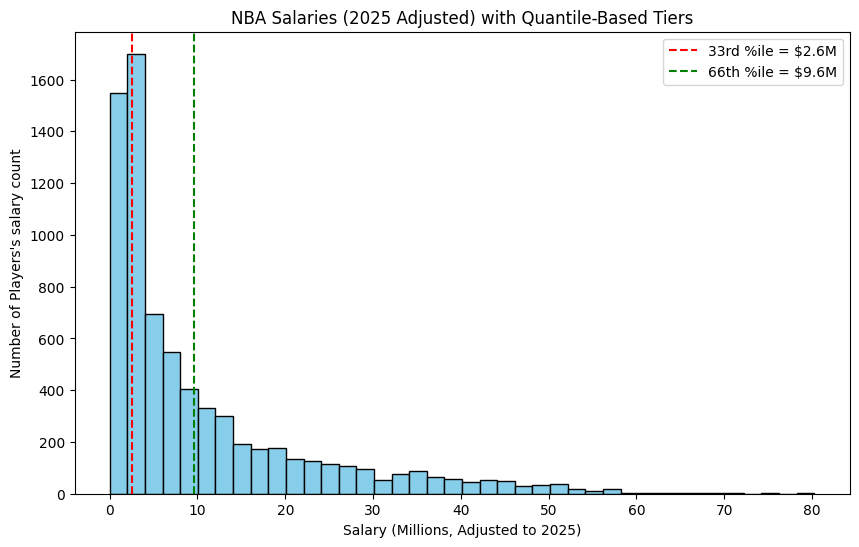

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df_adj["Salary_2025_Adjusted"]/1e6, bins=40, color="skyblue", edgecolor="black")
plt.axvline(q33/1e6, color="red", linestyle="--", label=f"33rd %ile = ${q33/1e6:.1f}M")
plt.axvline(q66/1e6, color="green", linestyle="--", label=f"66th %ile = ${q66/1e6:.1f}M")
plt.title("NBA Salaries (2025 Adjusted) with Quantile-Based Tiers")
plt.xlabel("Salary (Millions, Adjusted to 2025)")
plt.ylabel("Number of Players's salary count")
plt.legend()
plt.show()

In [ ]:
# scatter plolt salary vs season pts avg
brush = alt.selection_interval()
scatter = alt.Chart(df_adj).mark_circle().encode(
    x = alt.X("PTS:Q", title = "Season Points"),
    y = alt.Y("Salary:Q", title = "Salary"),
    color = alt.condition(brush, "Pos:N", alt.value("lightgray")),
    tooltip = ["Player","Team","Year","PTS","Salary","Pos"]
).add_params(brush).properties(title="Points vs Salary")

In [ ]:
scatter

alt.Chart(...)

In [ ]:
# numeric features correlation heatmap
corr = df_adj[num_features].corr().stack().reset_index()
corr.columns = ["feature_x","feature_y","corr"]

heatmap = alt.Chart(corr).mark_rect().encode(
    x = alt.X("feature_x:N", sort = num_features, title = ""),
    y = alt.Y("feature_y:N", sort = num_features, title = ""),
    color = alt.Color("corr:Q", scale = alt.Scale(scheme = "redblue", domain = [-1,1])),
    tooltip = ["feature_x","feature_y","corr"]
).properties(title = "Correlation Heatmap")

In [ ]:
heatmap

alt.Chart(...)

# Baseline

In [ ]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
# baseline of linear regression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# salary predictions
y_train_pred = lr.predict(x_train_scaled)
y_val_pred = lr.predict(x_val_scaled)

In [ ]:
# RMSE
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)

In [ ]:
print("Training RMSE: ", train_rmse)
print("\n")
print("Validation RMSE: ", val_rmse)

Training RMSE:  7858040.630880848


Validation RMSE:  7935700.838947377


In [ ]:
# categorize_salary and compare to true category
y_train_pred_tiers = pd.Series(y_train_pred).apply(categorize_salary)
y_train_true_tiers = df_working.loc[y_train.index, "Salary_Tier"]

y_val_pred_tiers = pd.Series(y_val_pred).apply(categorize_salary)
y_val_true_tiers = df_working.loc[y_val.index, "Salary_Tier"]

In [ ]:
# confusion matrix and accuracy
print("Train Accuracy:", accuracy_score(y_train_true_tiers, y_train_pred_tiers))
print("\nTrain Confusion Matrix:\n", confusion_matrix(y_train_true_tiers, y_train_pred_tiers))
print("\nTrain Classification Report:\n",
      classification_report(y_train_true_tiers, y_train_pred_tiers, target_names = class_order))

print("ValAccuracy:", accuracy_score(y_val_true_tiers, y_val_pred_tiers))
print("\nVal Confusion Matrix:\n", confusion_matrix(y_val_true_tiers, y_val_pred_tiers))
print("\nVal Classification Report:\n",
      classification_report(y_val_true_tiers, y_val_pred_tiers, target_names = class_order))

Train Accuracy: 0.5523069894929191

Train Confusion Matrix:
 [[1202   19  263]
 [ 196  602  688]
 [ 487  307  614]]

Train Classification Report:
               precision    recall  f1-score   support

         Low       0.64      0.81      0.71      1484
      Medium       0.65      0.41      0.50      1486
        High       0.39      0.44      0.41      1408

    accuracy                           0.55      4378
   macro avg       0.56      0.55      0.54      4378
weighted avg       0.56      0.55      0.54      4378

ValAccuracy: 0.576027397260274

Val Confusion Matrix:
 [[411   4  89]
 [ 67 216 197]
 [155 107 214]]

Val Classification Report:
               precision    recall  f1-score   support

         Low       0.65      0.82      0.72       504
      Medium       0.66      0.45      0.54       480
        High       0.43      0.45      0.44       476

    accuracy                           0.58      1460
   macro avg       0.58      0.57      0.57      1460
weighted avg    

In [ ]:
# run on test data
y_test_pred = lr.predict(x_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("Testing RMSE: ", test_rmse)

y_test_pred_tiers = pd.Series(y_test_pred).apply(categorize_salary)
y_test_true_tiers = df_working.loc[y_test.index, "Salary_Tier"]

Testing RMSE:  7751982.173798671


In [ ]:
print("Accuracy:", accuracy_score(y_test_true_tiers, y_test_pred_tiers))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_true_tiers, y_test_pred_tiers))
print("\nClassification Report:\n", classification_report(y_test_true_tiers, y_test_pred_tiers, target_names=class_order))

Accuracy: 0.5445205479452054

Confusion Matrix:
 [[400   7  86]
 [ 58 184 201]
 [198 115 211]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.61      0.81      0.70       493
      Medium       0.60      0.42      0.49       443
        High       0.42      0.40      0.41       524

    accuracy                           0.54      1460
   macro avg       0.54      0.54      0.53      1460
weighted avg       0.54      0.54      0.53      1460



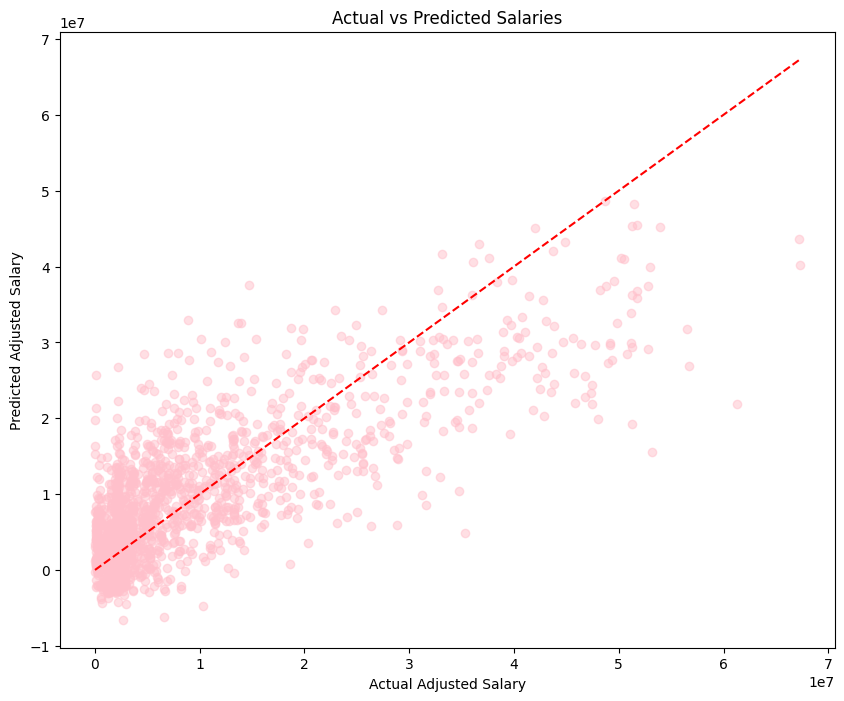

In [ ]:
# plotting test data results
plt.figure(figsize = (10, 8))
plt.scatter(y_test, y_test_pred, alpha = 0.5, color = "pink")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Adjusted Salary")
plt.ylabel("Predicted Adjusted Salary")
plt.title("Actual vs Predicted Salaries")
plt.show()

In [ ]:
!pip install xgboost -q
from xgboost import XGBRegressor

In [ ]:
# xgb model
xgb = XGBRegressor(
    # regression; minimize squared error
    objective = "reg:squarederror",
    # max trees
    n_estimators = 300,
    learning_rate = 0.05,
    # max depth
    max_depth = 5,
    # use 80% of rows
    subsample = 0.8,
    # use 80% of features
    colsample_bytree = 0.8,
    # track rmse
    eval_metric = "rmse",
    early_stopping_rounds = 30,
    random_state = 123,
    n_jobs = -1
)


In [ ]:
# fit model on train and val data
xgb.fit(
    x_train_scaled, y_train,
    eval_set=[(x_train_scaled, y_train), (x_val_scaled, y_val)],
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
# salary predictions for all data
y_train_pred = xgb.predict(x_train_scaled)
y_val_pred = xgb.predict(x_val_scaled)
y_test_pred = xgb.predict(x_test_scaled)

In [ ]:
# MSE and RMSE
def print_reg_results(split, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{split} MSE: {mse:,.2f}")
    print(f"{split} RMSE: {rmse:,.2f}\n")

print_reg_results("Train", y_train, y_train_pred)
print_reg_results("Val", y_val,   y_val_pred)
print_reg_results("Test", y_test,  y_test_pred)


Train MSE: 21,873,289,780,818.20
Train RMSE: 4,676,888.90

Val MSE: 46,658,350,357,597.01
Val RMSE: 6,830,691.79

Test MSE: 40,906,434,717,190.32
Test RMSE: 6,395,813.84



In [ ]:
# categorize_salary and compare to true category
y_train_true_tiers = df_working.loc[y_train.index, "Salary_Tier"]
y_train_pred_tiers = pd.Series(y_train_pred).apply(categorize_salary)
y_val_true_tiers   = df_working.loc[y_val.index,   "Salary_Tier"]
y_val_pred_tiers   = pd.Series(y_val_pred).apply(categorize_salary)
y_test_true_tiers  = df_working.loc[y_test.index,  "Salary_Tier"]
y_test_pred_tiers  = pd.Series(y_test_pred).apply(categorize_salary)

In [ ]:
# confusion matrix and accuracy
print("Train Accuracy:", accuracy_score(y_train_true_tiers, y_train_pred_tiers))
print("\nTrain Confusion Matrix:\n", confusion_matrix(y_train_true_tiers, y_train_pred_tiers))
print("\nTrain Classification Report:\n", classification_report(y_train_true_tiers, y_train_pred_tiers, target_names = class_order))

print("Val Accuracy:", accuracy_score(y_val_true_tiers, y_val_pred_tiers))
print("\nVal Confusion Matrix:\n", confusion_matrix(y_val_true_tiers, y_val_pred_tiers))
print("\nVal Classification Report:\n", classification_report(y_val_true_tiers, y_val_pred_tiers, target_names = class_order))

print("Test Accuracy:", accuracy_score(y_test_true_tiers, y_test_pred_tiers))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_true_tiers, y_test_pred_tiers))
print("\nClassification Report:\n", classification_report(y_test_true_tiers, y_test_pred_tiers, target_names=class_order))

Train Accuracy: 0.642987665600731

Train Confusion Matrix:
 [[1190    2  292]
 [  47  528  911]
 [ 211  100 1097]]

Train Classification Report:
               precision    recall  f1-score   support

         Low       0.82      0.80      0.81      1484
      Medium       0.84      0.36      0.50      1486
        High       0.48      0.78      0.59      1408

    accuracy                           0.64      4378
   macro avg       0.71      0.65      0.63      4378
weighted avg       0.72      0.64      0.63      4378

Val Accuracy: 0.6143835616438356

Val Confusion Matrix:
 [[382   0 122]
 [ 35 174 271]
 [ 94  41 341]]

Val Classification Report:
               precision    recall  f1-score   support

         Low       0.75      0.76      0.75       504
      Medium       0.81      0.36      0.50       480
        High       0.46      0.72      0.56       476

    accuracy                           0.61      1460
   macro avg       0.67      0.61      0.61      1460
weighted avg   

# **Improvement 1 - Regression Neural Network (RNN) **